# Introduction to Topic Modeling
## Day 2: Visualization and Evaluation
---
---

## Additional learning goals

* Understand Term Frequency–Inverse Document Frequency (TF-IDF) scores and why they are useful
* Understand different methods to calculate topic prevalence
* Learn how to create some simple graphs with topic prevalence
* Learn how to visualize topics with word clouds and pyLDAvis


## Outline
- [Load the data](#data)
- [Vectorize and train](#train)
- [Visualize topic words with `wordcloud`](#cloud)
- [Words aligned with each topic](#words)
- [Topic prevalence](#prevalence)
- [Topics over time](#time)
- [Visualising topics with pyLDAvis](#viz)
- [Evaluating the topic model](#eval)
- [Resources and alternatives](#resources)


## Key Terms
* *TF-IDF Scores*: 
    * short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
* *coherence*:
    * TO DO: Fill in
* *perplexity*:
    * TO DO: Fill in

## Load data

As always, first we load the data. We'll use the same dataset of children's literature described yesterday.

In [39]:
import pandas as pd
import numpy as np

df_lit = pd.read_csv("../assets/childrens_lit.csv.bz2", sep='\t', index_col=0, encoding = 'utf-8', compression='bz2')
df_lit = df_lit.dropna(subset=['text']) # drop where missing text

## Vectorize and train <a id='train'></a>

Yesterday, we used `scikit-learn`'s `CountVectorizer` to build a document-term matrix (DTM) in preparation for topic modeling. This used simple term counts and a bag of words approach to turn texts into numbers&mdash;also known as text vectorization. As a reference, here is the code to load the data, vectorize the texts by term frequencies, and train an LDA model:

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(max_df=0.80, min_df=50,
                                max_features=None,
                                stop_words='english')

# Create sparse DTM
tf_dtm = tf_vectorizer.fit_transform(df_lit.text)

In [41]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_samples = 2000
n_topics = 4
n_top_words = 50

print("Fitting LDA model with tf features, "
      "n_samples=%d and n_topics=%d..."
      % (n_samples, n_topics))

lda = LDA(n_components=n_topics, 
          max_iter=20,
          learning_method='online',
          learning_offset=80.,
          total_samples=n_samples,
          random_state=0)

#fit the model
lda.fit(dtm)
print("Done!")

Fitting LDA model with tf features, n_samples=2000 and n_topics=4...
Done!


In [42]:
def print_top_words(model, feature_names, n_top_words):
    '''Prints the top words for each topic in a pretty way.'''
    
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    
# print top words
print("\nTopics in LDA model with TF features and %d topics:" % n_topics)
print_top_words(lda, vocab, n_top_words)


Topics in LDA model with TF features and 4 topics:

Topic #0:
project doctor girls sister papa mamma london baby sweet tom street works dr remarked aunt tea youth foundation presently study em ain cousin office darling loved ladies wasn everybody public flower observed nurse ma shop snow ye queen class reader ice stairs flowers lovely agreement sisters doesn carriage bell garden

Topic #1:
dick uncle doctor er jack ain tom den yer fish em rock wolf gun rope lads ha birds rocks beneath ay stream shock tail moments mate excitedly garden eh sand fishing thrust ye nay gazing softly mountain ship tremendous hook bird leg ashore growled penny shore stones farther jump knife

Topic #2:
king army french troops camp attack officers prince ship john soldiers city village officer guns rode shore regiment march tom fort wounded british boats sword advanced castle jack james indian band marched native prisoners ships arrows france numbers lads forest frank ride presently vessel fought mounted flee

Let's build on yesterday's code by using a more nuanced text vectorization method: `term frequency inverse document frequency (TF-IDF)` scores, which give a word greater weight both when it is more frequent in a text AND when it is rare across the corpus. Words that are frequent, but are also used in every single document, will not be distinguishing. We want to identify words that are unevenly distributed across the corpus to identify distinctive words&mdash;while also filtering out common terms like 'the', 'of', and 'and' without manually removing them during preprocessing.

Traditionally, the inverse document frequency is calculated as such:

number_of_documents / number_documents_with_term

so:

tfidf_word1 = word1_frequency_document1 * (number_of_documents / number_document_with_word1)

You can, and often should, normalize the numerator: 

tfidf_word1 = (word1_frequency_document1 / word_count_document1) * (number_of_documents / number_document_with_word1)

We can calculate this manually, but scikit-learn has a built-in function to do so. This function also uses log frequencies, so the numbers will not correspond exactly to the calculations above. We'll use the [scikit-learn calculation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html), but a challenge for you: use Pandas to calculate this manually. 

### Challenge 1

Use `sklearn`'s `TfidfVectorizer()` function ([more info here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)) to weight features with TF-IDF.

In [ ]:
# your code here

In [43]:
# solution

from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize our text using TfidfVectorizer
print("Extracting tf-idf features for LDA...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.80, min_df=50,
                                   max_features=None,
                                   stop_words='english')

# Create sparse DTM with TF-IDF weighting
dtm = tfidf_vectorizer.fit_transform(df_lit.text)
print("Done!")

Extracting tf-idf features for LDA...
Done!


### Challenge 2

Train an LDA model using the TF-IDF-weighted. Then use the `print_top_words()` function defined above to display the top words for each topic. Compare with the output we just saw from the model trained using term frequencies.

In [ ]:
# your code here

In [53]:
# solution
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_samples = 2000
n_topics = 4
n_top_words = 50

print("Fitting LDA model with tf-idf features, "
      "n_samples=%d and n_topics=%d..."
      % (n_samples, n_topics))

lda = LDA(n_components=n_topics, 
          max_iter=20,
          learning_method='online',
          learning_offset=80.,
          total_samples=n_samples,
          random_state=0)

# fit the model
lda.fit(dtm)
print("Done!")

# print top words per topic
print("\nTopics in LDA model with TF-IDF features and %d topics:" % n_topics)
print_top_words(lda, vocab, n_top_words)

Fitting LDA model with tf-idf features, n_samples=2000 and n_topics=4...
Done!

Topics in LDA model with TF-IDF features and 4 topics:

Topic #0:
project papa dick mass mail ma doctor moonlight folks foundation mamma tiny seating shouldn island lake minded select loved shone wont minister beauty discussed believing plunged songs south dreary cliffs desired subdued rejoiced wounds reported riding entertainment delicate tea calculate dr sufficed pipe wicked remarked charged undertaking arrival brush animal

Topic #1:
dick fish sunk distinguished guns drifted suited consisting charming tail subsided peril attempted powder invalid blame plate prize unusual granted respected stunned solid reported amazement facing reputation stock clapping scratched string larger profit meat supposing pour tower bleeding climbing tie awe bade stolen absurd disaster rattle keen honestly plunged tumbled

Topic #2:
project doctor king dick tom uncle camp ship jack girls prince troops french em army shore ye de

## Visualize topic words with `wordcloud` <a id='cloud'></a>

To see the top words for each topic, let's use the `wordcloud` package. 

_Credit for example code: [Krunal on Medium](https://medium.com/@krunal18/topic-modeling-with-latent-dirichlet-allocation-lda-decomposition-scikit-learn-and-wordcloud-1ff0b8e8a8eb)_

Topic#  1
project,doctor,girls,sister,papa,mamma,london,baby,sweet,tom,street,works,dr,remarked,aunt,tea,youth,foundation,presently,study,em,ain,cousin,office,darling,loved,ladies,wasn,everybody,public,flower,observed,nurse,ma,shop,snow,ye,queen,class,reader,ice,stairs,flowers,lovely,agreement,sisters,doesn,carriage,bell,garden



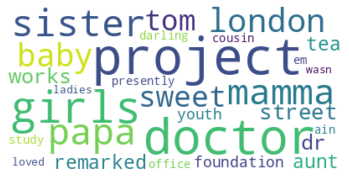

Topic#  2
dick,uncle,doctor,er,jack,ain,tom,den,yer,fish,em,rock,wolf,gun,rope,lads,ha,birds,rocks,beneath,ay,stream,shock,tail,moments,mate,excitedly,garden,eh,sand,fishing,thrust,ye,nay,gazing,softly,mountain,ship,tremendous,hook,bird,leg,ashore,growled,penny,shore,stones,farther,jump,knife



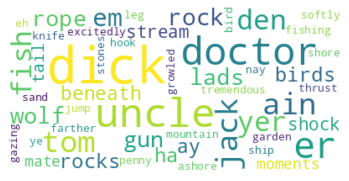

Topic#  3
king,army,french,troops,camp,attack,officers,prince,ship,john,soldiers,city,village,officer,guns,rode,shore,regiment,march,tom,fort,wounded,british,boats,sword,advanced,castle,jack,james,indian,band,marched,native,prisoners,ships,arrows,france,numbers,lads,forest,frank,ride,presently,vessel,fought,mounted,fleet,column,stream,rear



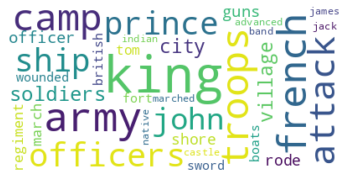

Topic#  4
jack,ye,frank,deck,project,uncle,ship,george,shore,doctor,vessel,ain,mate,lake,cabin,em,ma,st,john,works,boats,island,officer,girls,passengers,sail,street,church,thou,south,office,ha,fish,ay,yer,steam,soldier,ladies,regard,fleet,camp,public,foundation,rope,lads,illustration,bottle,pounds,stairs,crew



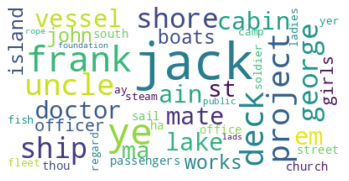

In [224]:
import wordcloud

terms_count = 50 # declare number of terms we need per topic

for idx,topic in enumerate(lda.components_): # loop over topics
    print('Topic# ',idx+1)
    topic_terms = [[terms[i],topic[i]] for i in topic.argsort()][:-terms_count-1:-1]
    topic_terms_sorted = [[vocab[i], topic[i]] for i in topic.argsort()[:-terms_count - 1:-1]]
    
    topic_words = []

    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print()

    dict_word_frequency = {}

    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]

    wcloud = wordcloud.WordCloud(background_color="white",mask=None, max_words=100, 
                       max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                       contour_width=3,contour_color='black')

    wcloud.generate_from_frequencies(dict_word_frequency)

    plt.imshow(wcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    #plt.savefig("WordCloud Topic "+str(idx+1)+".png", format="png")

## Words aligned with each topic <a id='words'></a>

Let's calculate the total number of words aligned with each topic and compare by author gender. 

First, we need to merge the topic loadings with the text into one big DataFrame, just like we did yesterday.

In [ ]:
# Get topic distribution and merge with main DataFrame
topic_dist = lda.transform(dtm)
topic_dist_df = pd.DataFrame(topic_dist)
df_w_topics = topic_dist_df.join(df_lit)

In [45]:
#first create word count column

df_w_topics['word_count'] = df_w_topics['text'].apply(lambda x: len(str(x).split()))
df_w_topics['word_count']

0       96493
1      100603
2       85132
3       92822
4       48251
        ...  
122     68589
123     76593
124     56018
125     53942
126    108275
Name: word_count, Length: 127, dtype: int64

In [46]:
#multiply topic weight by word count

df_w_topics['0_wc'] = df_w_topics[0] * df_w_topics['word_count']
df_w_topics['0_wc']

0      89544.893129
1       2750.319905
2      82773.973483
3      92813.400143
4      46769.319262
           ...     
122        3.232002
123    73544.948175
124        1.447412
125        1.081305
126        2.422885
Name: 0_wc, Length: 127, dtype: float64

In [47]:
#create a for loop to do this for every topic

col_list = []
for num in topic_columns:
    col = "%d_wc" % num
    col_list.append(col)
    df_w_topics[col] = df_w_topics[num] * df_w_topics['word_count']
    
df_w_topics

,0,1,2,3,title,author gender,year,text,word_count,0_wc,1_wc,2_wc,3_wc
0,0.927994,0.014370,0.057603,0.000034,A Dog with a Bad Name,Male,1886.0,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...,96493,89544.893129,1386.608095,5558.264002,3.234773
1,0.027338,0.070131,0.491328,0.411202,A Final Reckoning,Male,1887.0,A Final Reckoning: A Tale of Bush Life in Aust...,100603,2750.319905,7055.421499,49429.084933,41368.173663
2,0.972302,0.000037,0.022598,0.005064,"A House Party, Don Gesualdo, and A Rainy June",Female,1887.0,A HOUSE-PARTY Don Gesualdo and A Rainy June...,85132,82773.973483,3.116905,1923.824216,431.085396
3,0.999907,0.000031,0.000031,0.000031,A Houseful of Girls,Female,1889.0,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ...",92822,92813.400143,2.846490,2.882587,2.870780
4,0.969292,0.028883,0.000061,0.001764,A Little Country Girl,Female,1885.0,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ...",48251,46769.319262,1393.626070,2.921490,85.133178
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.000047,0.000047,0.000048,0.999858,Treasure Island,Male,1883.0,TREASURE ISLAND by Robert Louis Stevenson ...,68589,3.232002,3.214454,3.282020,68579.271523
123,0.960205,0.000054,0.005191,0.034551,Twice Bought,Male,1885.0,"The Project Gutenberg EBook of Twice Bought, b...",76593,73544.948175,4.102616,397.586668,2646.362541
124,0.000026,0.000025,0.999923,0.000026,Two Arrows,Male,1886.0,TWO ARROWS HARPER'S YOUNG PEOPLE'S SERIES...,56018,1.447412,1.423235,56013.692946,1.436407
125,0.000020,0.000020,0.999940,0.000020,Uncle Remus: His Songs and Sayings,Male,1880.0,Uncle Remus: His Songs and His Sayings By Joe...,53942,1.081305,1.091519,53938.737610,1.089566


### Challenge

- What is the total number of words aligned with each topic, by author gender?
- What is the proportion of total words aligned with each topic, by author gender?

In [31]:
#your code here

In [48]:
#solution
grouped = df_w_topics.groupby('author gender')
for e in col_list:
    print(e)
    print(grouped[e].sum())

0_wc
author gender
Female    1.150752e+06
Male      2.460418e+06
Name: 0_wc, dtype: float64
1_wc
author gender
Female    1.484812e+05
Male      1.719037e+06
Name: 1_wc, dtype: float64
2_wc
author gender
Female    1.392767e+05
Male      2.593460e+06
Name: 2_wc, dtype: float64
3_wc
author gender
Female    6.686701e+04
Male      1.124740e+06
Name: 3_wc, dtype: float64


In [49]:
for e in col_list:
    print(e)
    print(grouped[e].sum()/grouped['word_count'].sum())

0_wc
author gender
Female    0.764428
Male      0.311538
dtype: float64
1_wc
author gender
Female    0.098634
Male      0.217664
dtype: float64
2_wc
author gender
Female    0.092519
Male      0.328384
dtype: float64
3_wc
author gender
Female    0.044419
Male      0.142414
dtype: float64


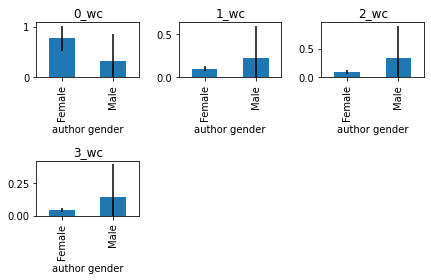

In [50]:
fig2 = plt.figure()
chrt = 0
for e in col_list:
    chrt += 1 
    ax2 = fig2.add_subplot(2,3, chrt)
    (grouped[e].sum()/grouped['word_count'].sum()).plot(
        kind = 'bar', 
        yerr = grouped[e].sum()/grouped['word_count'].sum().std(), 
        ylim=0, ax=ax2, title=e)

fig2.tight_layout()
plt.show()

Question: Why might we want to do one calculation over the other? Take average topic weight per documents versus the average number of words aligned with each topic?

This brings us to...

## Topic Prevalence <a id='prevalence'></a>

How do we define prevalence? What are different ways of measuring this, and the benefits/drawbacks of each?

#### TO DO: Provide some answers here.

### Challenge

- Find the most prevalent topic in the corpus.
- Find the least prevalent topic in the corpus.        

In [36]:
#your code here

In [51]:
#solution
for e in col_list:
    print(e)
    print(df_w_topics[e].sum()/df_w_topics['word_count'].sum())

0_wc
0.3840432895308944
1_wc
0.19860793419265882
2_wc
0.29062288331375674
3_wc
0.12672589296269


## Prevalence over time <a id='overtime'></a>

We can do the same as above, but by year, to graph the prevalence of each topic over time.

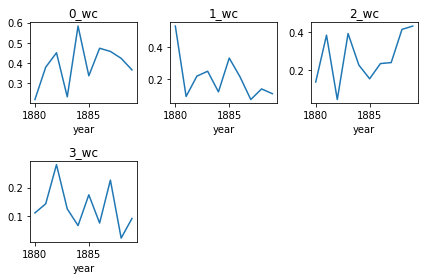

In [52]:
grouped_year = df_w_topics.groupby('year')
fig3 = plt.figure()
chrt = 0
for e in col_list:
    chrt += 1 
    ax2 = fig3.add_subplot(2,3, chrt)
    (grouped_year[e].sum()/grouped_year['word_count'].sum()).plot(
        kind='line', title=e)
    
fig3.tight_layout()
plt.show()

Topic 2 I interpret to be about battles in France. What is going on between 1880 and 1884 in France that might make this topic increasingly popular over this time period?

## Visualising topics with pyLDAvis <a id='viz'></a>

Understanding the data that underlies a topic model is vital, but fortunately we also have a slightly more human-friendly option to help us interpret the topics!

[pyLDAvis](https://github.com/bmabey/pyLDAvis) is a library for creating interactive topic model visualisations. It even has a helper function specifically for scikit-learn that we can use.

> **It will take a while to load this visualisation!**

In [83]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

# Silence an annoying warning we cannot do anything about
import warnings
warnings.filterwarnings('ignore')

In [84]:
pyLDAvis.sklearn.prepare(lda, dtm, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.067144 -0.057703       1        1  35.723702
0      0.012048  0.063136       2        1  35.454139
1     -0.099979 -0.026718       3        1  17.201155
3      0.020787  0.021285       4        1  11.621004, topic_info=         Term         Freq        Total Category  logprob  loglift
815      dick  4914.000000  4914.000000  Default  30.0000  30.0000
1564     jack  3862.000000  3862.000000  Default  29.0000  29.0000
2989    uncle  3740.000000  3740.000000  Default  28.0000  28.0000
989        er  2337.000000  2337.000000  Default  27.0000  27.0000
870    doctor  5069.000000  5069.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1572     john   290.175681  2306.869082   Topic4  -5.9127   0.0792
2747   street   237.391109  1323.321827   Topic4  -6.1135   0.4342
1915  officer   257.116585  1703.200395   Topic4  -6.0337   0.2616
870    doctor   339.829496  5069.883998   Topic4  -5.7548  -0.5503
1255    girls   245.323294  2264.521683   Topic4  -6.0807  -0.0702

[258 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
5         1  0.049988     _you_
5         2  0.864494     _you_
5         3  0.020583     _you_
5         4  0.064690     _you_
56        1  0.763321  advanced
...     ...       ...       ...
3193      4  0.030138    yonder
3196      1  0.234008     youth
3196      2  0.655812     youth
3196      3  0.040312     youth
3196      4  0.069809     youth

[824 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

Here are some hints to help you interpret the visualisation:

* On the **left-hand side** is a scatterplot of some bubbles:
 * Each **bubble** represents a topic.
 * The **size of a bubble** represents how _prevalent_ or popular the topic is overall.
 * The **distance** from one bubble to another represents how similar the topics are to each other. If they overlap then the topics share significant similarity.
 
* On the **right-hand side** is a histogram of terms (tokens):
 * Select a bubble and it shows the top-30 **most relevant terms** for that topic.
 * The **red bar** represents how frequent a term is in the topic.
 * The **blue bar** represents how frequent the term is overall in all topics. So a long red bar with only a short blue bar indicates a term that is highly specific to that particular topic. Conversely, a red bar with a long blue bar means the term is also present in many other topics.
 * By mousing over a particular term, the size of the bubbles changes to show the relative frequency of that term in the various topics.
 * By adjusting the slide, it adjusts the **_relevance_ value (λ)**, which is the weight given to whether a term appears exclusively in a particular topic or is spread over topics more evenly. If λ = 1 terms are ranked according to their probabilities in the particular topic only; if λ = 0 terms are ranked higher if they are unusual terms that occur almost exclusively in that topic. Typically, the optimal value is around 0.6, but it is interesting to adjust it and observe any differences.

## Evaluating the topic model <a id='eval'></a>

#### TO DO: Add code here

Use tmtoolkit: https://tmtoolkit.readthedocs.io/en/latest/topic_modeling.html

Consider grid search too: https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/

---
---

## Resources and alternatives <a id='resources'></a>

In addition to LDA in `scikit-learn`, there are a few other common tools for topic modeling in Python:
- [Here's a detailed example of using LDA in scikit-learn](https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py), including several alternatives (like NMF) we won't explore.
- The other major topic modeling package is [Gensim](https://radimrehurek.com/gensim/) (example implementation [here](https://github.com/bhargavvader/personal/blob/master/notebooks/text_analysis_tutorial/topic_modelling.ipynb) and [here](https://github.com/susanli2016/NLP-with-Python/blob/master/LDA_news_headlines.ipynb)). 
- Another option is [textacy](https://textacy.readthedocs.io/en/latest/), which is built on the powerful spaCy library for text manipulation ([example implementation](https://github.com/repmax/topic-model/blob/master/topic-modelling.ipynb)).

Another well-known tool for topic modeling is called [MALLET](http://mallet.cs.umass.edu/topics.php), which is a program (written in Java) that you download to your computer. You have to type commands to use MALLET, but it has otherwise done a great deal for you. 
- [Getting Started with Topic Modeling and MALLET](https://programminghistorian.org/en/lessons/topic-modeling-and-mallet) from Programming Historian gives a step-by-step tutorial on MALLET.
- There is a graphical interface for MALLET called [Topic Modeling Tool](https://github.com/senderle/topic-modeling-tool) that is a bit easier to use. The [Quickstart Guide](https://senderle.github.io/topic-modeling-tool/documentation/2017/01/06/quickstart.html) will get you up and running.

If you are looking to use R rather than Python, then `tidytext` is a popular NLP library that will help you work with the `topicmodels` package. 
- The book _Text Mining with R_ devotes [chapter 6](https://www.tidytextmining.com/topicmodeling.html) to tidytext.

Finally, if coding isn't your thing, you can explore the topics of a few documents in a casual way with the online digital text environment [Voyant Tools](https://voyant-tools.org/), which allows you to upload or copy-and-paste texts and explore a corpus with a number of graphical tools, including topics.